# PROJECT 2

## Dataset link: https://www.kaggle.com/datasets/rmisra/clothing-fit-dataset-for-size-recommendation


##  Project Objective:
Based on the given users and items data of an e-commerce company, segment
the similar user and items into suitable clusters. Analyze the clusters and provide
your insights to help the organization promote their business.


## Attribute Information

In [67]:
import pandas as pd
# Create a DataFrame with attribute information
attribute_info = pd.DataFrame({
    'Attribute': ['user_id', 'item_id', 'weight', 'rented for', 'body type', 'review_text', 'size', 'rating', 'age', 'category', 'bust size', 'height', 'review_date', 'fit'],
    'Description': ['a unique id for the customer', 'unique product id', 'weight measurement of customer', 'purpose clothing was rented for', 'body type of customer', 'review given by the customer', 'the standardized size of the product', 'rating for the product', 'age of the customer', 'the category of the product', 'bust measurement of customer', 'height of the customer', 'date when the review was written', 'fit feedback']
})

attribute_info

Attribute                           Description
0       user_id          a unique id for the customer
1       item_id                     unique product id
2        weight        weight measurement of customer
3    rented for       purpose clothing was rented for
4     body type                 body type of customer
5   review_text          review given by the customer
6          size  the standardized size of the product
7        rating                rating for the product
8           age                   age of the customer
9      category           the category of the product
10    bust size          bust measurement of customer
11       height                height of the customer
12  review_date      date when the review was written
13          fit                          fit feedback

## ● Import the required libraries and load the data:
### 1. Load the required libraries and read the dataset.

In [68]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [69]:
# reading the dataset

try:
    df = pd.read_json('renttherunway_final_data.json', lines=True)
except FileNotFoundError: # if file path is invalid of the file does not exist
    print("File not found.")
except pd.errors.EmptyDataError: # if the file is empty or has no data
    print("No data")
except pd.errors.ParserError: # if the file has malformed or invalid data that cannot be parsed.
    print("Parse error")
except UnicodeDecodeError: # if the file has a different encoding than the default or specified one.
    print("Encoding error")
except Exception: # handling other exceptions
    print("Error encountered! Please review your code")

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [70]:
# first few samples : 
df.head()

fit  user_id bust size  item_id  weight  rating     rented for  \
0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1  fit   273551       34b   153475  132lbs    10.0          other   
2  fit   360448       NaN  1063761     NaN    10.0          party   
3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height  size  \
0                               So many compliments!   romper  5' 8"    14   
1                            I felt so glamourous!!!     gown  5' 6"    12   
2  It was a great time to celebrate the (almost) ...   sheath  5' 4"     4   
3   Dress arrived on time and in perfect condition.     dress  5' 5"     8   
4                    Was in love with this dress !!!     gown  5' 9"    12   

     age         review_date  
0   28.0      April 20, 2016  
1   36.0       June 18, 2013  
2  116.0   December 14, 2015  
3   34.0   February 12, 2014  
4   27.0  September 26, 2016

In [71]:
# general infromation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192544 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192544 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [72]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/192544)*100})
missing_data

total_missing  perc_missing
fit                         0      0.000000
user_id                     0      0.000000
bust size               18411      9.561970
item_id                     0      0.000000
weight                  29982     15.571506
rating                     82      0.042588
rented for                 10      0.005194
review_text                 0      0.000000
body type               14637      7.601899
review_summary              0      0.000000
category                    0      0.000000
height                    677      0.351608
size                        0      0.000000
age                       960      0.498587
review_date                 0      0.000000

In [73]:
# number of unique entries in each attribute
df.nunique()

fit                    3
user_id           105571
bust size            106
item_id             5850
weight               190
rating                 5
rented for             9
review_text       191031
body type              7
review_summary    154740
category              68
height                24
size                  56
age                   89
review_date         2274
dtype: int64

In [74]:
# dropping 10 rows
df = df[df['rented for'].notna()]

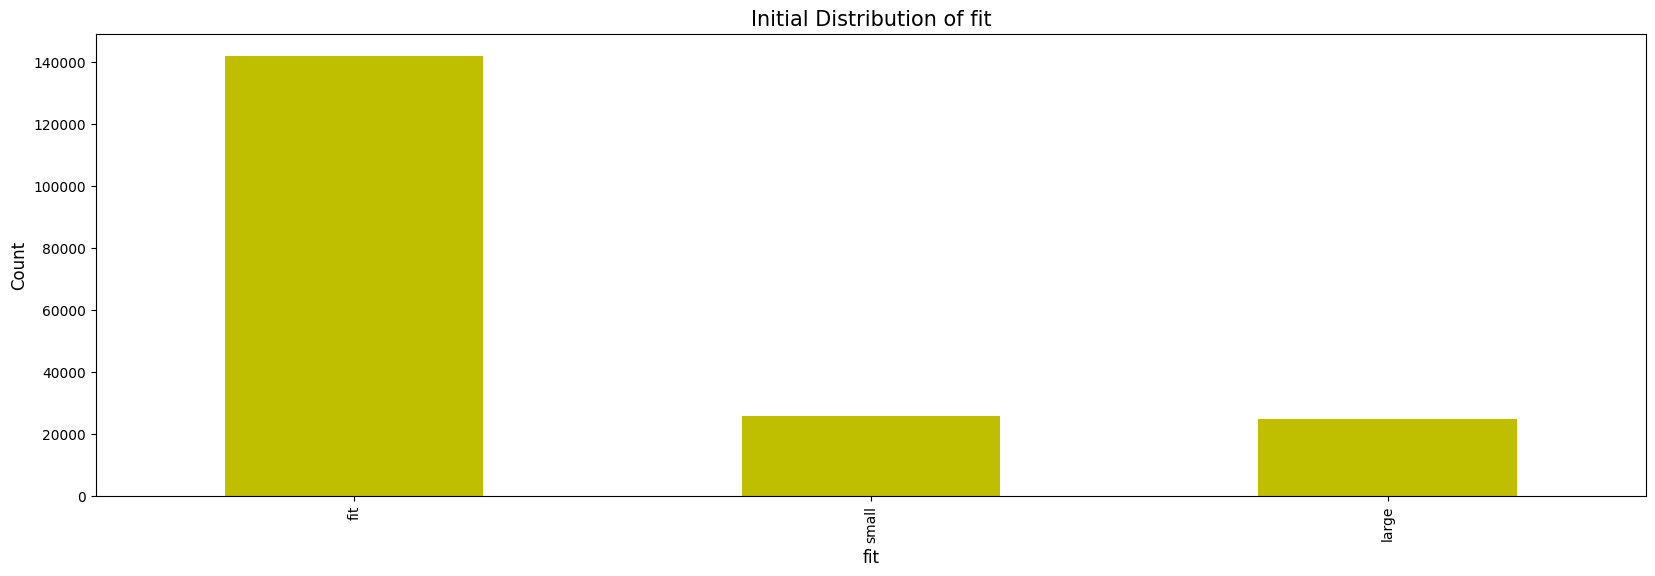

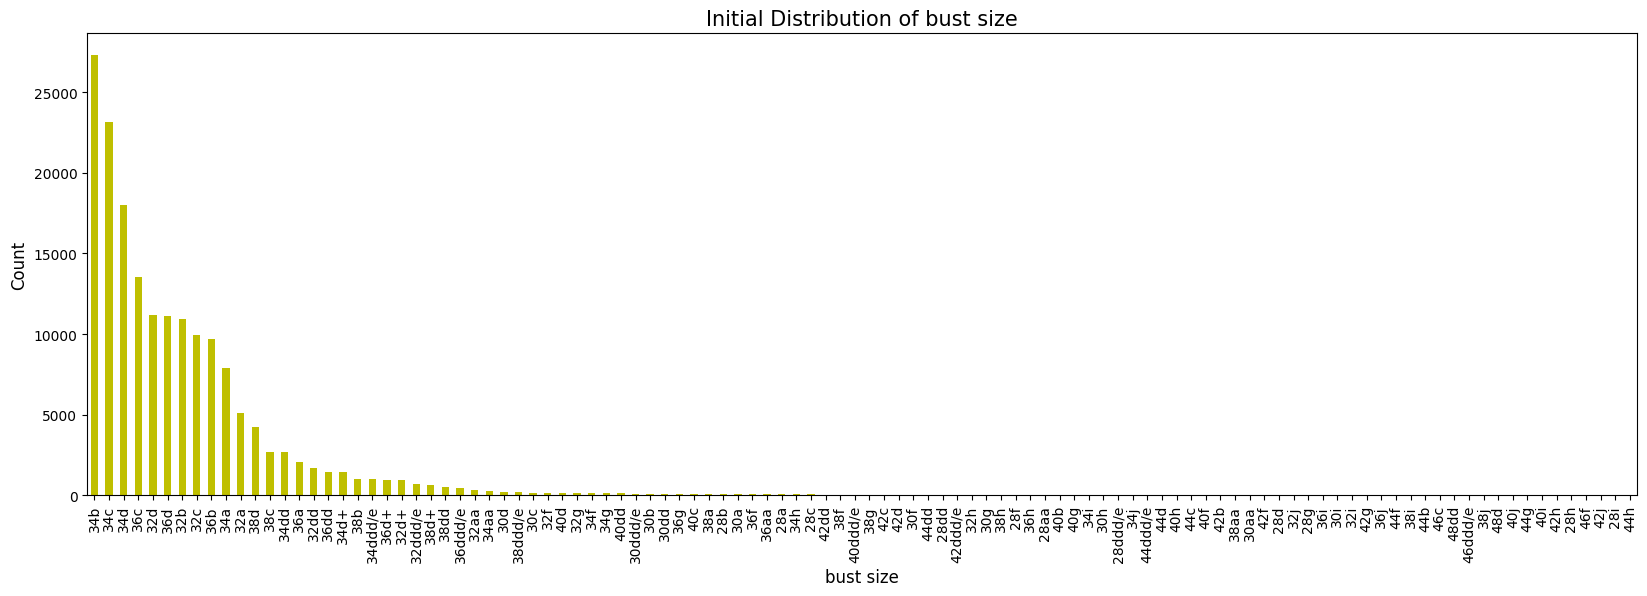

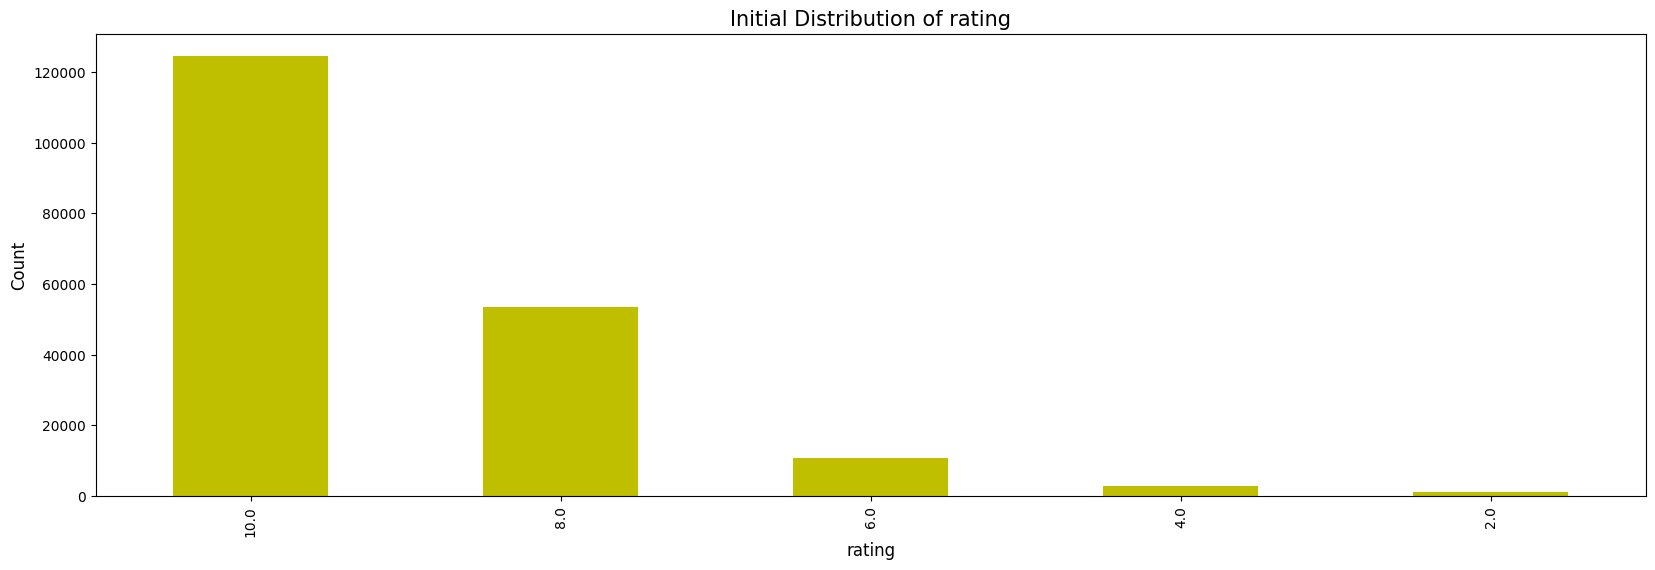

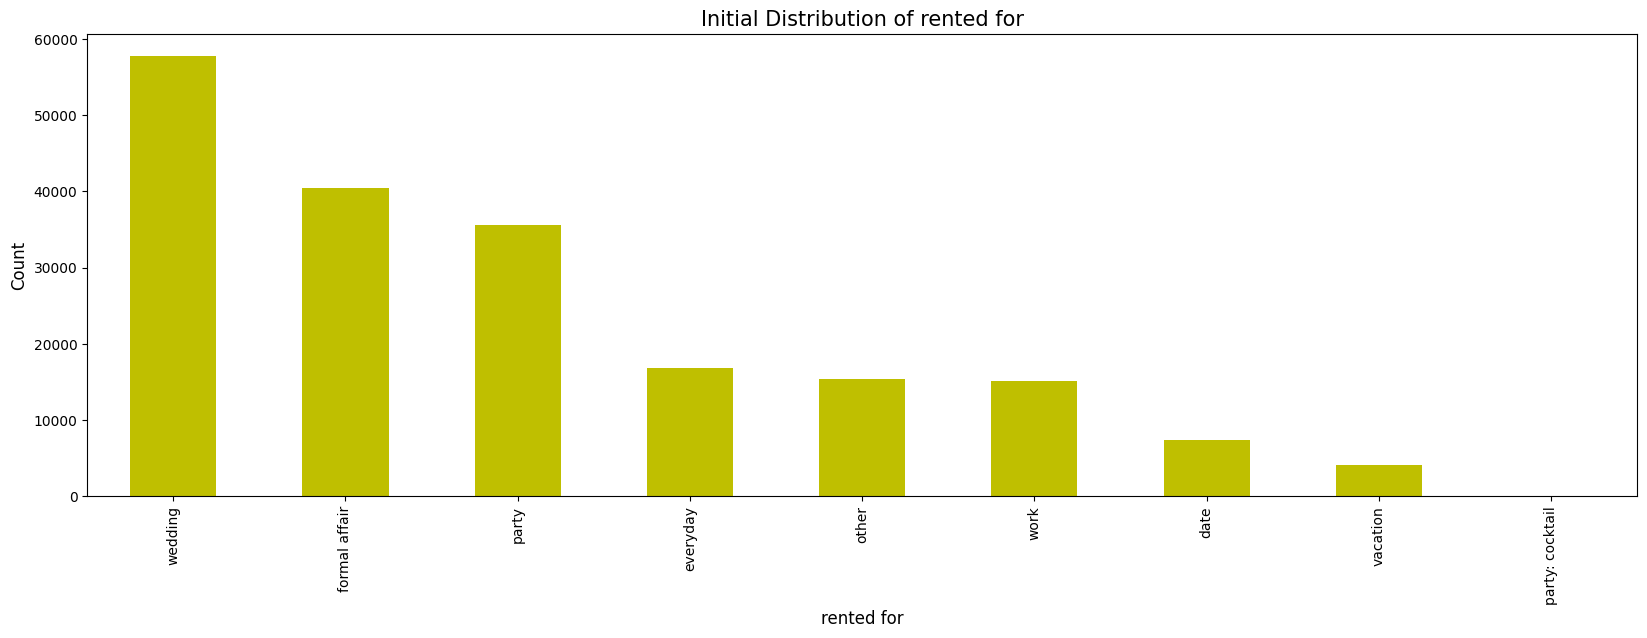

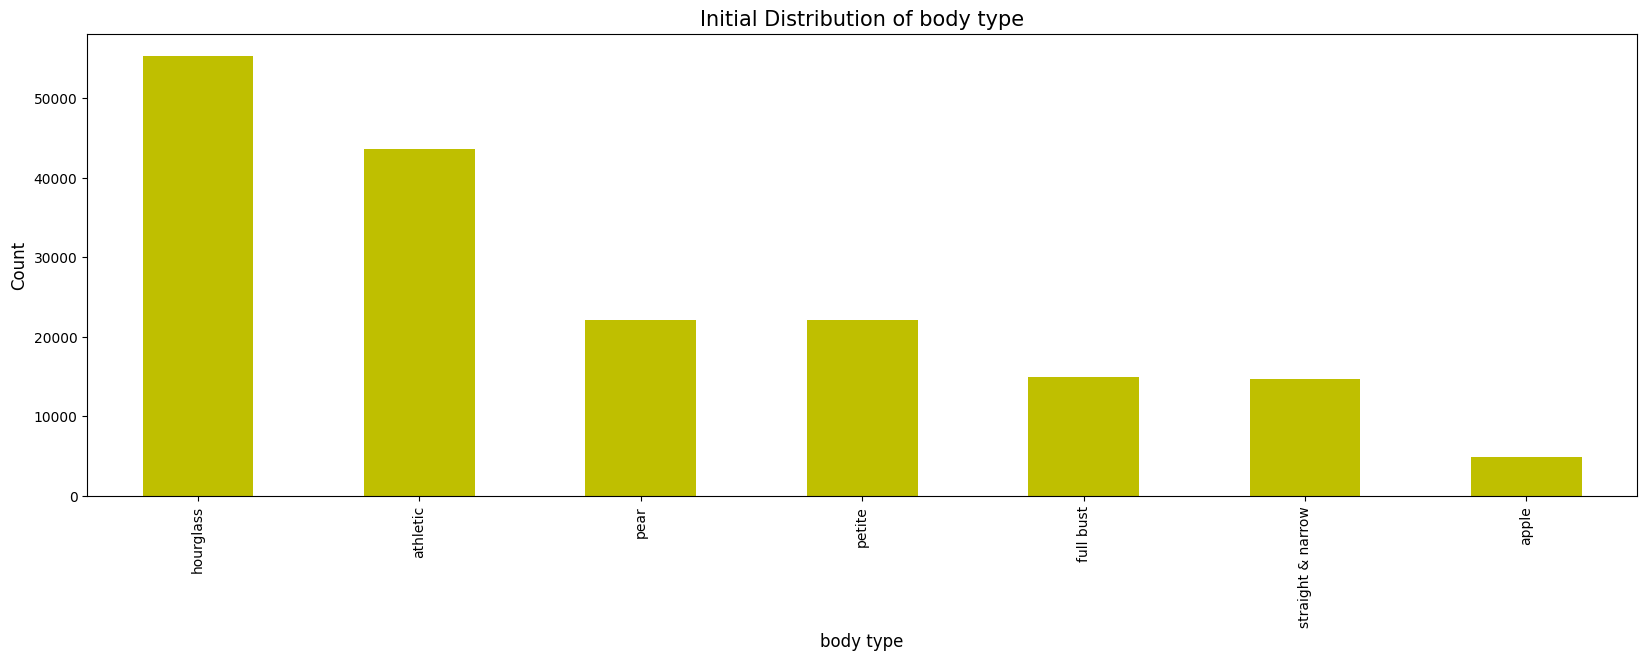

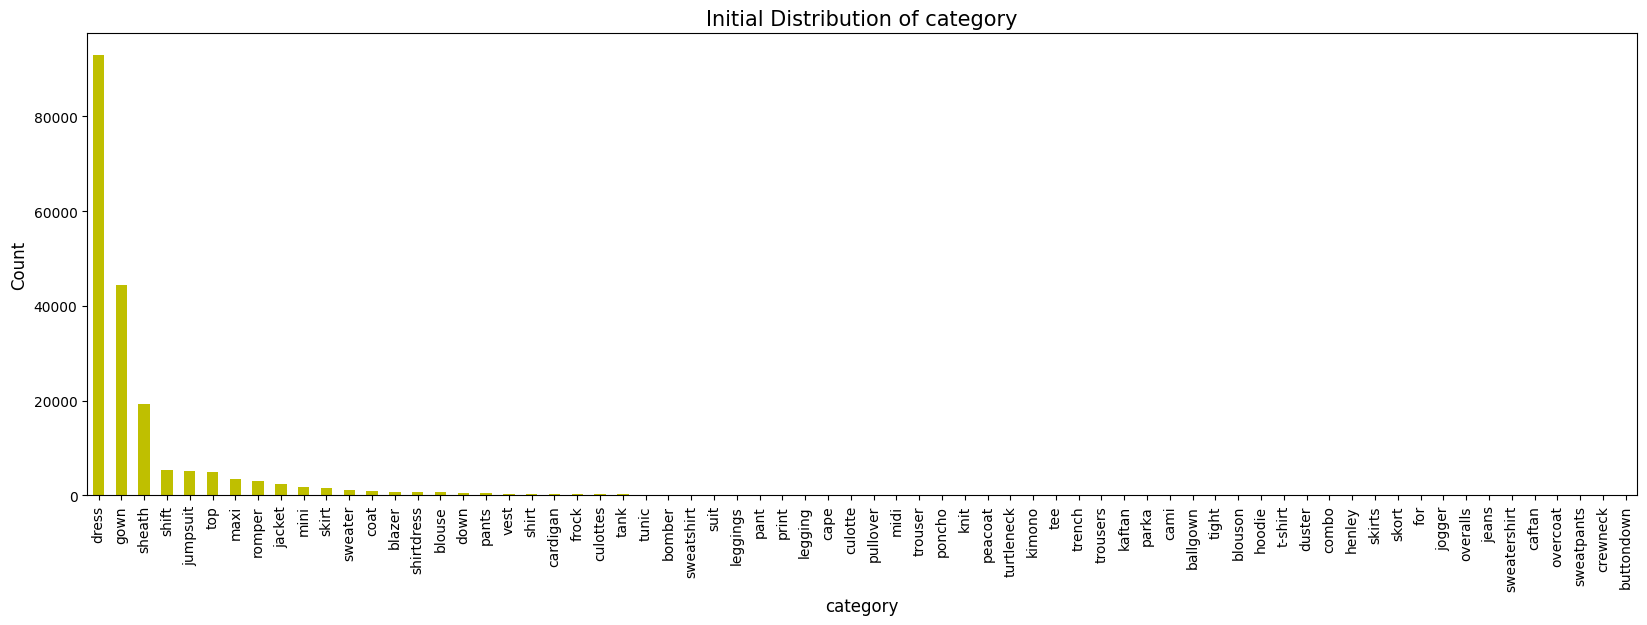

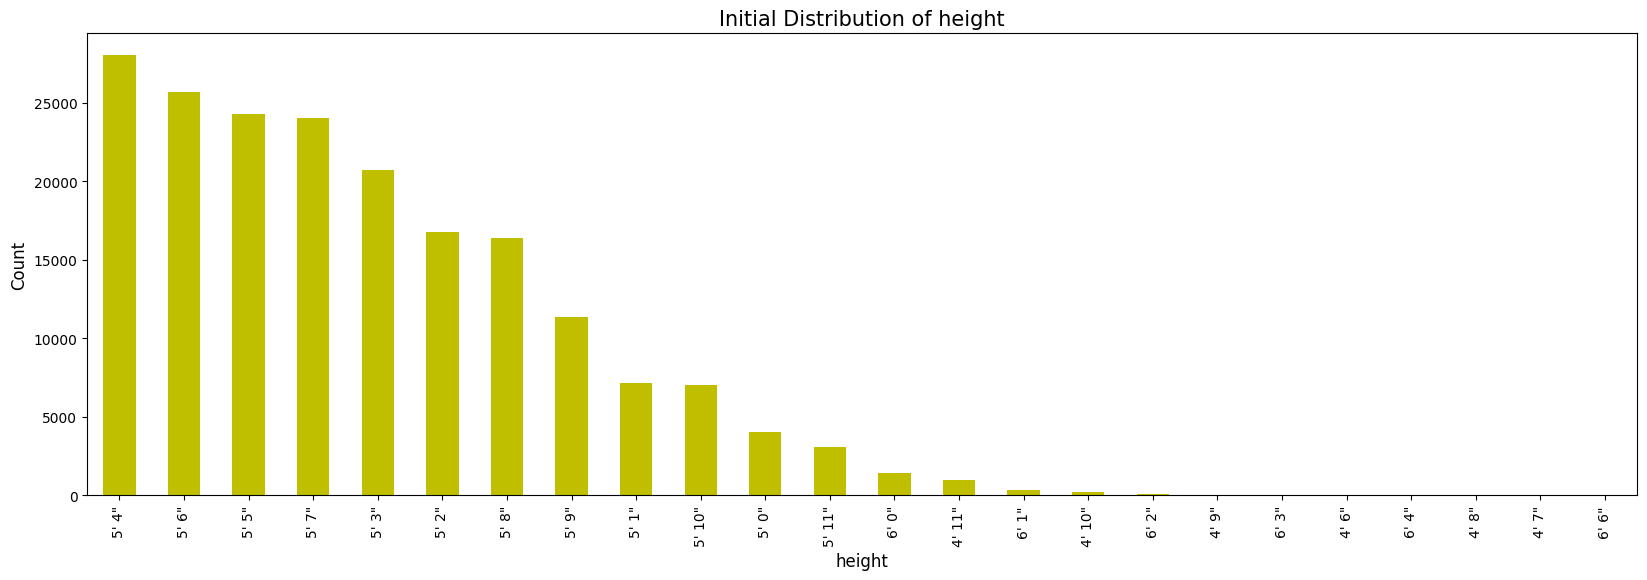

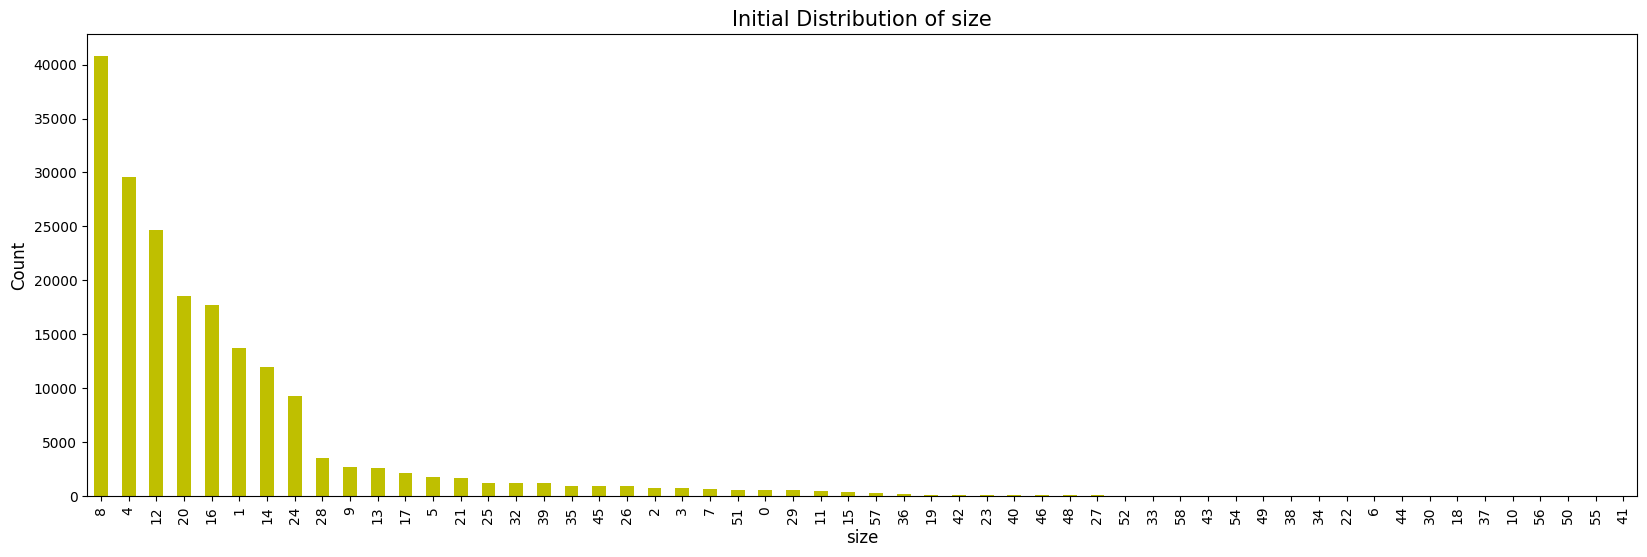

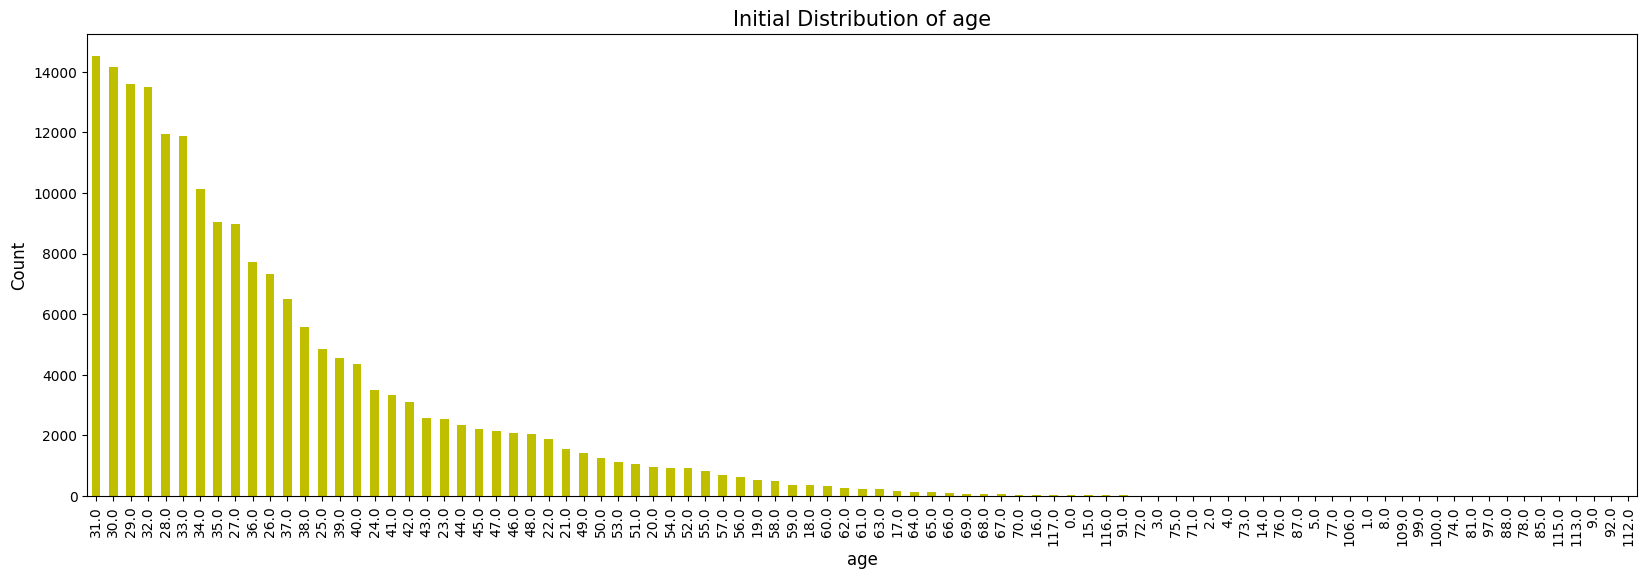

In [75]:
def plot_dist(col):
    fig, ax = plt.subplots(figsize=(20, 6))
    df[col][df[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title("Initial Distribution of {}".format(col), fontsize=15)
    plt.show()

# Lista kolona koje želimo da prikažemo
cols = ['fit', 'bust size', 'rating', 'rented for', 'body type', 'category', 'height', 'size', 'age']#, 'cup_size_start_in_cms', 'cup_size_end_in_cms', 'band_size_start_in_cms', 'band_size_end_in_cms']

# Prikazivanje distribucije za svaku kolonu
for col in cols:
    plot_dist(col)

### Observations:
- There are 15 columns and at most 192544 rows in the dataset. Some records seem to be missing in case of some attibutes.
- This dataset contains atributes of different datatypes:
    - float64 : 2 columns
    - int64 : 4 columns
    - object/string : 10 columns 
- The number of unique values in each attribute is varied. Some arrtibutes like 'user_id', 'review_text', 'review_summary' seem to have a high number of unique values. The number of unique values in other attributes is less

### 3. Check if there are any duplicate records in the dataset? If any, drop them

- There are some duplicate records in the dataset
- These records need to be dropped

In [76]:
# Checking for duplicate records
duplicate_records = df[df.duplicated()]

if not duplicate_records.empty:
    print("Duplicate records found. Dropping duplicates...")
    # Dropping duplicate records but keeping the first ones
    df = df.drop_duplicates(keep="first")

    print("Duplicates dropped. Updated shape of the data:", df.shape)
else:
    print("No duplicate records found.")

Duplicate records found. Dropping duplicates...
Duplicates dropped. Updated shape of the data: (192345, 15)


### 4. Drop the columns which you think redundant for the analysis.

- Based on the given project objective of segmenting users and items for an e-commerce company, here are some columns that might be considered redundant:

    - <b>user_id and item_id</b>: These columns provide unique identifiers for users and items, which may not be directly relevant for segmentation analysis. However, they may still be useful for tracking and referencing purposes.

    - <b>review_text, review_summary and review_date</b>: While customer reviews, their summaries and their dates could provide valuable insights, they might not be necessary for initial segmentation analysis, especially if sentiment analysis or temporal analysis is not a primary focus.

In [77]:
# list of columns to drop
drop_cols = ['user_id', 'item_id', 'review_text', 'review_summary', 'review_date']

# dropping the redundannr columns
df = df.drop(columns = drop_cols)

# checking if the columns are dropped or not
all_removed = True
for col_name in drop_cols:
    if col_name in df.columns:
        all_removed = False
        break
        
if all_removed:
    print("The columns have been removed.")
else:
    print("The columns have not been removed.")

The columns have been removed.


### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float.

In [78]:
def convert_weight_to_float(weight):
    try:
        # Convert weight to string
        weight_str = str(weight)
        # Remove "lbs" suffix and convert to float
        weight_float = float(weight_str.replace("lbs", ""))
        return weight_float
    except ValueError:
        # If the conversion fails, return NaN
        return float('nan')

# Apply the function to the 'Weight' column to remove the suffix and convert to float
df['weight'] = df['weight'].apply(convert_weight_to_float)

In [79]:
# check ramdom records for the column
df['weight'].sample(5)

47282     130.0
82106     135.0
133719    150.0
59928       NaN
42099     112.0
Name: weight, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party:cocktail' category with 'party'.

In [80]:
# Check unique categories in the 'rented for' column
unique_categories = df['rented for'].unique()

# Display the unique categories before grouping
print("Unique categories before grouping:")
print(unique_categories)

Unique categories before grouping:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' 'party: cocktail']


In [81]:
# Group 'party: cocktail' category with 'party'
df['rented for'] = df['rented for'].replace('party: cocktail', 'party')

# Verify unique categories after grouping
unique_categories_after_grouping = df['rented for'].unique()

# Display the unique categories after grouping
print("\nUnique categories after grouping:")
print(unique_categories_after_grouping)


Unique categories after grouping:
['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work']


### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype

In [82]:
# define function to convert 'heaight' to folat datatype
def convert_height_to_dec(height):
    try:
        if pd.isnull(height):  # If the value is NaN, return NaN 
            return height
        height_str = str(height)  # Convert height to string
        if "'" and '"' in height_str:
            height_str = height_str.replace('"', "")
            feet, inches = height_str.split("'")
            # 1 feet = 12 inches
            total_inches = int(feet) * 12 + int(inches)
            height_in_decimal = total_inches / 12
        else:
            # If the value doesn't contain "'", assume it's already in decimal format
            height_in_decimal = float(height_str)
    except Exception as e:
        # If any error occurs during conversion, return NaN
        height_in_decimal = float('nan')
    return height_in_decimal

In [83]:
# Apply the function to the 'height' column to convert it to decimal feet
df['height'] = df['height'].apply(convert_height_to_dec)

# sample 'height' records
df['height'].sample(5)

124487    5.833333
40611     5.666667
170009    5.166667
125872    5.583333
20518     5.166667
Name: height, dtype: float64

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [84]:
# Calculating the percentage of missing values in each column
missing_percentage = df.isna().mean() * 100

# Print the percentage of missing values for each column
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
fit            0.000000
bust size      9.560425
weight        15.573579
rating         0.042112
rented for     0.000000
body type      7.603525
category       0.000000
height         0.350932
size           0.000000
age            0.499103
dtype: float64


- The percentage of missing values in almost all columns are not high and can be imputed using the proper imputation techniques
- The columns will be differentiated on the basis of type of the variable(numercial or categorical) and if they have missing values or not. Then, the respective imputation techniques will be applied to fill the missing records

In [85]:
# impute mod value
df['bust size'] = df['bust size'].fillna(df['bust size'].mode().iloc[0])
df['rating'] = df['rating'].fillna(df['rating'].mode().iloc[0])

In [86]:
# Numerical
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

numerical_columns = [ 'weight', 'height', 'age']

# Initialize IterativeImputer with desired configuration
imputer = IterativeImputer()

# Apply imputation
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Check the results
print(df[numerical_columns].isnull().sum())

# Check if any missing values remain
print("Remaining missing values after imputation:")
print(df.isnull().sum())

weight    0
height    0
age       0
dtype: int64
Remaining missing values after imputation:
fit               0
bust size         0
weight            0
rating            0
rented for        0
body type     14625
category          0
height            0
size              0
age               0
dtype: int64


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

def impute_categorical_feature(target_column = 'body type'):
    df[target_column] = df[target_column].astype('category')

    # Split the data into two parts: one with complete data for the target variable and another with missing values
    df_complete = df.dropna(subset=[target_column])
    df_missing = df[df[target_column].isnull()]

    # Encode categorical variables
    encoder = LabelEncoder()

    # Combine the complete and missing data to ensure consistent encoding of categories
    combined_data = pd.concat([df_complete, df_missing])

    # Encode categorical columns
    for col in combined_data.select_dtypes(include=['object']):
        combined_data[col] = encoder.fit_transform(combined_data[col].astype(str))

    # Split the combined data back into complete and missing parts
    X_complete = combined_data.dropna(subset=[target_column])
    X_missing = combined_data[combined_data[target_column].isnull()]

    # Train a classifier
    classifier = RandomForestClassifier()
    classifier.fit(X_complete.drop(columns=[target_column]), X_complete[target_column])

    # Predict missing values
    predicted_values = classifier.predict(X_missing.drop(columns=[target_column]))

    # Impute missing values
    df.loc[df[target_column].isnull(), target_column] = predicted_values

    # Check if any missing values remain
    print("Remaining missing values after imputation:")
    print(df.isnull().sum())

In [88]:
impute_categorical_feature('body type')

Remaining missing values after imputation:
fit           0
bust size     0
weight        0
rating        0
rented for    0
body type     0
category      0
height        0
size          0
age           0
dtype: int64


- All columns have been successfully impputed and there are no more missing values in the dataset 

### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [89]:
# Statistical summary for numerical columns
numerical_summary = df.describe().T
print('The statistical summary of numerical columns :')
numerical_summary

The statistical summary of numerical columns :


count        mean        std   min     25%         50%         75%  \
weight  192345.0  137.490042  20.412551  50.0  125.00  135.000000  145.696339   
rating  192345.0    9.092734   1.429852   2.0    8.00   10.000000   10.000000   
height  192345.0    5.442533   0.221630   4.5    5.25    5.416667    5.583333   
size    192345.0   12.246068   8.496293   0.0    8.00   12.000000   16.000000   
age     192345.0   33.870291   8.038377   0.0   29.00   32.000000   37.000000   

          max  
weight  300.0  
rating   10.0  
height    6.5  
size     58.0  
age     117.0

### Based on the statistical summary of numerical columns, here are some insights that can be derived:

1. Weight:
    - The mean weight of customers is approximately 137.02 lbs, with a standard deviation of approximately 20.14 lbs.
      This indicates that the weights of customers vary around the mean by about 20.14 lbs on average.
    - The minimum weight observed is 50.0 lbs, and the maximum weight observed is 300.0 lbs, suggesting a wide range 
      of weights among customers.
    - The mean is greater than the median(135.000000) suggestiong some postive or right skew in the distribution of 'weight'.
    - The majority of customers (approximately 50%) have weights between 125.0 lbs (25th percentile) and 145.0 lbs 
      (75th percentile), as indicated by the interquartile range.

2. Rating:
    - The mean rating for products is approximately 9.09 out of 10, with a standard deviation of approximately 1.43. 
      This suggests that, on average, customers rate the products highly.
    - The minimum rating observed is 2.0, and the maximum rating observed is 10.0, indicating a wide range of ratings 
      provided by customers.
    - The mean is slightly lesser than the median(10.0). Suggesting a slight left/negative-skew in the distribution of 'rating'.
    - Most ratings (approximately 75%) fall within the range of 8.0 (25th percentile) and 10.0 (75th percentile), 
      as indicated by the IQR.

3. Height:
    - The mean height of customers is approximately 5.44 feet (or 65.31 inches), with a standard deviation of approximately 
      0.22 feet (or 2.67 inches). This suggests that the heights of customers vary around the mean by about 0.22 feet 
      on average.
    - The minimum height observed is 4.5 feet (or 54 inches), and the maximum height observed is 6.5 feet 
      (or 78 inches), indicating a range of heights among customers.
    - The majority of customers (approximately 50%) have heights between 5.25 feet (or 63 inches) and 5.58 feet 
      (or 67 inches), as indicated by the IQR.
    - The mean and median for 'rating' are almost same (5.4) suggesting an almost evenly spread distribution.

4. Size:

    - The mean size of products rented by customers is approximately 12.25, with a standard deviation of approximately 
      8.50. This suggests that there is some variability in the sizes of products rented by customers.
    - The minimum size observed is 0, and the maximum size observed is 58, indicating a wide range of sizes for the products.
    - Most sizes (approximately 75%) fall within the range of 8.0 (25th percentile) and 16.0 (75th percentile), as indicated 
      by the IQR.
    - The mean and median for 'size' are almost same (12) suggesting an almost evenly spread distribution.
    
5. Age:
    - The mean age of customers is approximately 33.86 years, with a standard deviation of approximately 8.04 years. 
       This suggests that the ages of customers vary around the mean by about 8.04 years on average.
    - The minimum age observed is 0 years, and the maximum age observed is 117 years, indicating a wide range of ages 
      among customers.
    - The majority of customers (approximately 50%) have ages between 29 years (25th percentile) and 37 years 
      (75th percentile), as indicated by the IQR.
    - There is some postivie skew in the data for 'age'
    
#### These insights provide a better understanding of the distribution and characteristics of the numerical variables in the dataset. They can be used to tailor marketing strategies, product offerings, and customer experiences to better meet the needs and preferences of different customer segments.

In [90]:
# Statistical summary for categorical columns
categorical_summary = df.describe(include=['object','category']).T
print('The statistical summary of categorical columns :')
categorical_summary

The statistical summary of categorical columns :


count unique        top    freq
fit         192345      3        fit  141900
bust size   192345    106        34b   45641
rented for  192345      8    wedding   57737
body type   192345      7  hourglass   60615
category    192345     68      dress   92745

### Based on the provided statistical summary of categorical columns, here are some insights and inferences that can be derived:

1. Fit:
    - There are three unique values for the "fit" column: "fit", "small", and "large".
    - The most frequent value is "fit", which occurs 141,909 times out of 192,355 records.
    - This suggests that the majority of customers perceive the clothing items they rent as fitting well.
    
2. Bust Size:
    - There are 106 unique values for the "bust size" column, indicating a wide variety of bust sizes among customers.
    - The most frequent bust size is "34b", occurring 45,647 times out of 192,355 records.
    - This provides insight into the distribution of bust sizes among customers, with "34b" being the most common size.

3. Rented For:
    - There are eight unique values for the "rented for" column, representing different purposes for which customers 
      rent clothing items.
    - The most common reason for renting clothing items is "wedding", which occurs 57,747 times out of 192,355 records.
    - This suggests that weddings are a significant occasion for which customers often rent clothing items.
    
4. Body Type:
    - There are seven unique values for the "body type" column, representing different body types of customers.
    - The most frequent body type is "hourglass", occurring 69,915 times out of 192,355 records.
    - This provides insight into the diversity of body types among customers, with "hourglass" being the most common type.
    
5. Category:
    - There are 68 unique values for the "category" column, indicating a wide range of product categories available for rent.
    - The most common category is "dress", which occurs 92,752 times out of 192,355 records.
    - This suggests that dresses are the most popular type of clothing item rented by customers.
    
#### These insights provide valuable information about the preferences, behaviors, and demographics of customers using the rental service. Additionally, it can help identify trends and patterns in customer behavior, leading to more targeted and effective business decisions.

### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

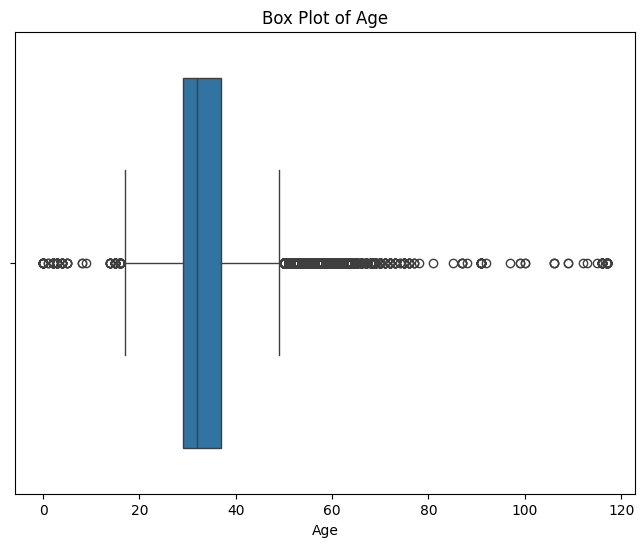

In [91]:
# Plotting a box plot for the 'age' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

- The plot suggests there is presence of outliers in 'age' attribute. These outliers can be treated using the various methods : IQR method, Z-score method, log transformation, square root and cube root transformations, winsorization etc.
- Here, we will be employing the IQR method to 

In [92]:
# calculating the first and the third quartiles. IQR = Q3 - Q1
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
# Inter Quartile Range
IQR = Q3 - Q1

# calculation upper and lower whishers
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

# Remove the outliers from the DataFrame - data points lying lower than the lower whisker and higher than the upper whisker
df = df[~((df['age'] < lower_limit) | (df['age'] > upper_limit))]

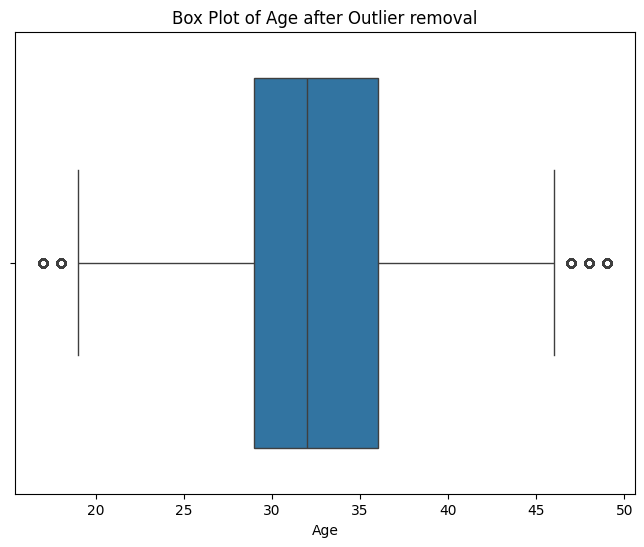

In [93]:
# Plotting a box plot for the 'age' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age after Outlier removal')
plt.xlabel('Age')
plt.show()

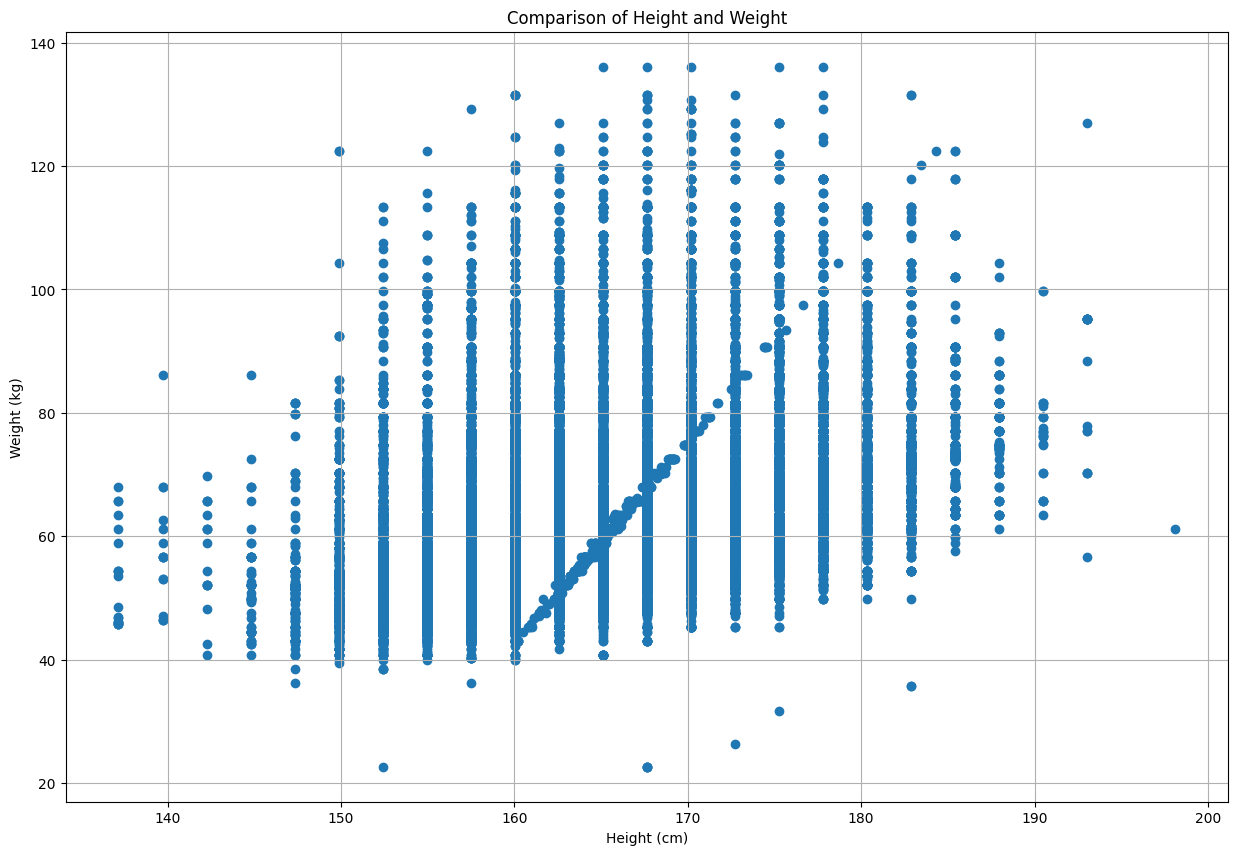

In [94]:
def plot_height_weight(df):
    # Convert height from feet to centimeters (1 foot = 30.48 cm)
    height_cm = df['height'] * 30.48

    # Convert weight from pounds to kilograms (1 pound = 0.453592 kg)
    weight_kg = df['weight'] * 0.453592

    # Display scatter plot
    plt.figure(figsize=(15, 10))
    plt.scatter(height_cm, weight_kg)
    plt.title('Comparison of Height and Weight')
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
    plt.grid(True)
    plt.show()


# Call the function with your DataFrame
plot_height_weight(df)


In [95]:
df['height'] = pd.to_numeric(df['height'], errors='coerce')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')

# Define the minimum and maximum valid values for height, weight, and BMI
min_height_ft, max_height_ft = 4, 7  # Example range for height in feet
min_weight_lb, max_weight_lb = 90, 250  # Example range for weight in pounds
min_bmi, max_bmi = 15, 45  # Example range for BMI

# Filter the DataFrame based on the specified range of height, weight, and BMI
df = df[
    (df['height'].between(min_height_ft, max_height_ft)) &
    (df['weight'].between(min_weight_lb, max_weight_lb)) &
    (((df['weight'] / ((df['height'] * 12) ** 2)) * 703).between(min_bmi, max_bmi))
]

In [96]:
df

fit bust size  weight  rating     rented for          body type  \
0       fit       34d   137.0    10.0       vacation          hourglass   
1       fit       34b   132.0    10.0          other  straight & narrow   
3       fit       34c   135.0     8.0  formal affair               pear   
4       fit       34b   145.0    10.0        wedding           athletic   
5       fit       32b   138.0     8.0           date           athletic   
...     ...       ...     ...     ...            ...                ...   
192539  fit      34dd   140.0    10.0           work          hourglass   
192540  fit       32c   100.0    10.0           work             petite   
192541  fit       36a   135.0     6.0       everyday  straight & narrow   
192542  fit       36c   165.0    10.0        wedding               pear   
192543  fit       36b   155.0    10.0        wedding           athletic   

        category    height  size   age  
0         romper  5.666667    14  28.0  
1           gown  5.500000    12  36.0  
3          dress  5.416667     8  34.0  
4           gown  5.750000    12  27.0  
5          dress  5.666667     8  45.0  
...          ...       ...   ...   ...  
192539  jumpsuit  5.750000     8  42.0  
192540     dress  5.083333     4  29.0  
192541     dress  5.666667     8  31.0  
192542     dress  5.500000    16  31.0  
192543      gown  5.500000    16  30.0  

[181867 rows x 10 columns]

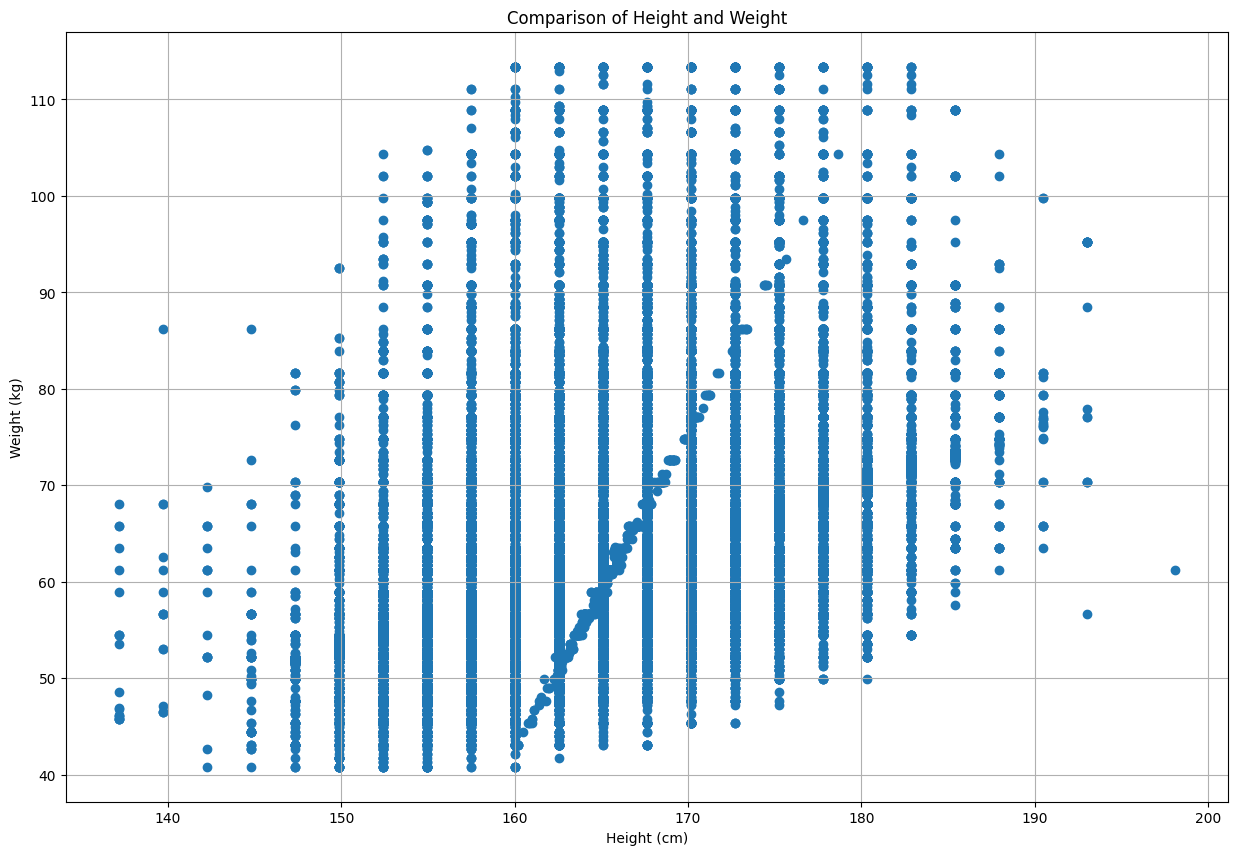

In [97]:
plot_height_weight(df)

- The Outliers have been removed

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

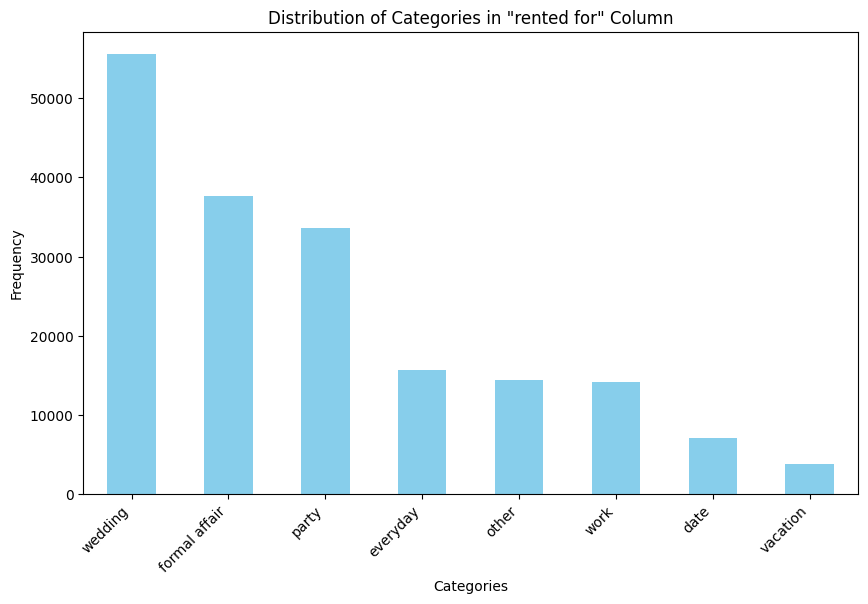

In [98]:
# Plotting the distribution of 'rented for' categories
plt.figure(figsize=(10, 6))
df['rented for'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories in "rented for" Column')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## ● Data Preparation for model building:

In [99]:
# Keep a copy of the cleaned dataset (we will use it to assign the cluster labels and will analyze the clusters formed)
df_copy = df.copy()
df_copy.head()

fit bust size  weight  rating     rented for          body type category  \
0  fit       34d   137.0    10.0       vacation          hourglass   romper   
1  fit       34b   132.0    10.0          other  straight & narrow     gown   
3  fit       34c   135.0     8.0  formal affair               pear    dress   
4  fit       34b   145.0    10.0        wedding           athletic     gown   
5  fit       32b   138.0     8.0           date           athletic    dress   

     height  size   age  
0  5.666667    14  28.0  
1  5.500000    12  36.0  
3  5.416667     8  34.0  
4  5.750000    12  27.0  
5  5.666667     8  45.0

### 12. Encode the categorical variables in the dataset

In [100]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables using LabelEncoder
df['fit_encoded'] = label_encoder.fit_transform(df['fit'])
df['bust_size_encoded'] = label_encoder.fit_transform(df['bust size'])
df['rented_for_encoded'] = label_encoder.fit_transform(df['rented for'])
df['body_type_encoded'] = label_encoder.fit_transform(df['body type'])
df['category_encoded'] = label_encoder.fit_transform(df['category'])

df.head()

fit bust size  weight  rating     rented for          body type category  \
0  fit       34d   137.0    10.0       vacation          hourglass   romper   
1  fit       34b   132.0    10.0          other  straight & narrow     gown   
3  fit       34c   135.0     8.0  formal affair               pear    dress   
4  fit       34b   145.0    10.0        wedding           athletic     gown   
5  fit       32b   138.0     8.0           date           athletic    dress   

     height  size   age  fit_encoded  bust_size_encoded  rented_for_encoded  \
0  5.666667    14  28.0            0                 38                   5   
1  5.500000    12  36.0            0                 36                   3   
3  5.416667     8  34.0            0                 37                   2   
4  5.750000    12  27.0            0                 36                   6   
5  5.666667     8  45.0            0                 23                   0   

   body_type_encoded  category_encoded  
0                  3                44  
1                  6                20  
3                  4                16  
4                  1                20  
5                  1                16

In [101]:
# Drop the original categorical columns after label-encoding
df.drop(columns=['fit', 'bust size', 'rented for', 'body type', 'category'], inplace=True)

# Display the dataset with encoded categorical variables
df.head()

weight  rating    height  size   age  fit_encoded  bust_size_encoded  \
0   137.0    10.0  5.666667    14  28.0            0                 38   
1   132.0    10.0  5.500000    12  36.0            0                 36   
3   135.0     8.0  5.416667     8  34.0            0                 37   
4   145.0    10.0  5.750000    12  27.0            0                 36   
5   138.0     8.0  5.666667     8  45.0            0                 23   

   rented_for_encoded  body_type_encoded  category_encoded  
0                   5                  3                44  
1                   3                  6                20  
3                   2                  4                16  
4                   6                  1                20  
5                   0                  1                16

### 13. Standardize the data, so that the values are within a particular range.

In [102]:
# Initializing the Standard Scaler Class
standard_scalar = StandardScaler()

# standardizing the dataframe values
scaled_features = standard_scalar.fit_transform(df.values)

# storing the standardized values as a dataframe
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns= df.columns)

scaled_features_df.head()

weight    rating    height      size       age  fit_encoded  \
0 -0.011735  0.635907  1.008549  0.238766 -0.769186    -0.556682   
1 -0.263418  0.635907  0.258032 -0.002074  0.548756    -0.556682   
3 -0.112408 -0.765288 -0.117226 -0.483754  0.219271    -0.556682   
4  0.390959  0.635907  1.383807 -0.002074 -0.933929    -0.556682   
5  0.038602 -0.765288  1.008549 -0.483754  2.031442    -0.556682   

   bust_size_encoded  rented_for_encoded  body_type_encoded  category_encoded  
0           0.019862            0.504919           0.022777          1.577913  
1          -0.164998           -0.466005           1.863051         -0.304699  
3          -0.072568           -0.951467           0.636202         -0.618468  
4          -0.164998            0.990381          -1.204072         -0.304699  
5          -1.366587           -1.922391          -1.204072         -0.618468

## ● Principal Component Analysis and Clustering: 

### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained bythe same. 

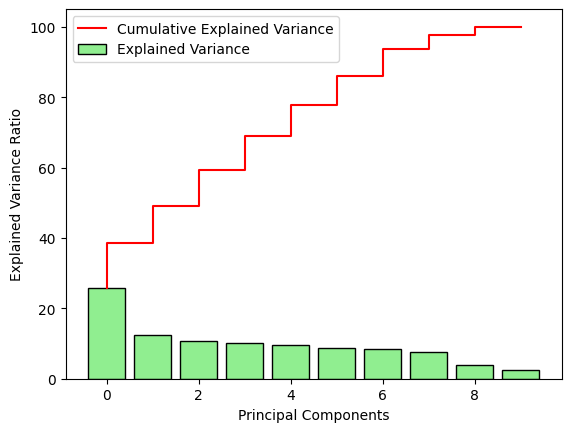

In [103]:
# covariance matrix
covariance_matrix = np.cov(scaled_features.T)

# eigen values and eigen vector
eigen_vals, eigen_vectors = np.linalg.eig(covariance_matrix)

# scree plot
total = sum(eigen_vals)
variance_explained = [(i / total) * 100 for i in sorted(eigen_vals, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)

# Diagram
plt.bar(range(len(variance_explained)), variance_explained, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(len(cumulative_variance_explained)), cumulative_variance_explained, color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

- The scree plot saturates between 7 or 8 principal components (we see that 90-95% of the data can be be explained by 8 or 9 principal components)
- Proceeding with 7 principal components

In [104]:
# Fitting the PCA model
pca=PCA(n_components = 7)
pca.fit(scaled_features_df)

PCA(n_components=7)

In [105]:
# transforming scaled data to principal components.
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
data_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  0.266376 -0.900518  0.371387  1.143795  1.481540  0.513279 -0.365696
1 -0.606937 -0.689043  0.482888 -0.433648 -0.948081  1.343736 -0.942479
2 -0.516322  0.204671  0.400050 -0.086667 -1.214160  0.145908 -0.298079
3  0.700616 -1.241124 -1.278900  0.994398  0.746893 -0.895490 -0.417555
4 -0.029161  0.289613  1.492714  0.054373 -1.585300 -2.338252 -1.608675

### 15. Apply K-means clustering and segment the data
   - a. Find the optimal K Value using elbow plot for K Means clustering.
   - b. Build a Kmeans clustering model using the obtained optimal K value
         from the elbow plot.
   - c. Compute silhouette score for evaluating the quality of the K Means
       clustering technique.

In [106]:
# Define the range of cluster numbers to explore
cluster_range = range(2, 15)

# Create an empty list to store the cluster errors for each number of clusters
cluster_errors = []

# Iterate over each number of clusters in the defined range
for num_clusters in cluster_range:
   
    # Initialize KMeans clustering with the current number of clusters and a random state for reproducibility
    clusters = KMeans(num_clusters, random_state=100)
    
    # Fit the KMeans model to the PCA-transformed data
    clusters.fit(data_pca)
    
    # Calculate the inertia, which represents the sum of squared distances of samples to their closest cluster center
    cluster_errors.append(clusters.inertia_)

# Create a DataFrame to store the number of clusters and their corresponding cluster errors
clusters_df = pd.DataFrame({'num_clusters': cluster_range, 
                             'cluster_errors': cluster_errors})

# Display the DataFrame containing the number of clusters and their corresponding errors
clusters_df

num_clusters  cluster_errors
0              2    1.274463e+06
1              3    1.153073e+06
2              4    1.045895e+06
3              5    9.584574e+05
4              6    9.062834e+05
5              7    8.623229e+05
6              8    8.296111e+05
7              9    7.988814e+05
8             10    7.719650e+05
9             11    7.491197e+05
10            12    7.290629e+05
11            13    7.109061e+05
12            14    6.923250e+05

Text(0, 0.5, 'Error')

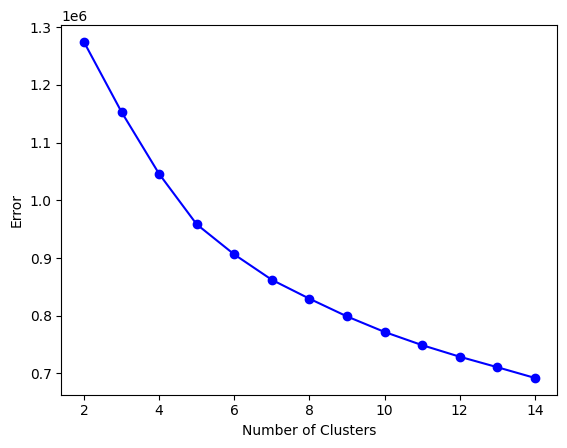

In [107]:
# elbow plot
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')

- We can see from this plot that the optimum k value is between 4 - 6.
- proceeding with 4 clusters

In [108]:
# Applying KMeans
# Fitting the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=4, random_state=100)

- The dataset i huge. so to reduce computational time, we will be taking 10% of the scaled dataset to calculate the 
  silhoutte score

In [109]:
# library to take a sample size of the scaled dataset
from sklearn.utils import shuffle

# Take a random sample of 10% of the scaled features data
sampled_scaled_features_df = shuffle(scaled_features_df, random_state=42).sample(frac=0.1, random_state=42)
kmeans_cl = None
labels = None

for i in range(2, 15):
    # Initialize Kmeans Clustering with the current number of clusters (i)
    kmeans_cl = KMeans(n_clusters=i)
    
    # Fit the Kmeans Clustering model to the sampled scaled features data
    kmeans_cl = kmeans_cl.fit(sampled_scaled_features_df)
    
    # Predict the cluster labels for each data point in the sampled data
    labels = kmeans_cl.fit_predict(sampled_scaled_features_df)
    
    # Compute the silhouette score for the clustering result on the sampled data
    score = silhouette_score(sampled_scaled_features_df, labels)
    
    # Print the number of clusters and the corresponding silhouette score
    print(i, score)
labels

2 0.15157048594156847
3 0.1507504649740371
4 0.11578905806232628
5 0.12155346834197826
6 0.10593642483754877
7 0.10468914157479921
8 0.11151064506812208
9 0.10108794904560002
10 0.10693567096411102
11 0.10564818865391348
12 0.10861207385017962
13 0.10951107359504036
14 0.10377225372572656


array([ 6, 13,  5, ...,  0,  2,  4])

In [110]:
# Fitting PCA and transforming data
pca = PCA(n_components=7)
pca.fit(scaled_features_df)
data_pca = pca.transform(scaled_features_df)

# Fitting KMeans and predicting labels
kmeans_cl = KMeans(n_clusters=4, random_state=100)
labels = kmeans_cl.fit_predict(data_pca)

# Creating a DataFrame to store principal components and labels
kmeans_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
kmeans_df['Label'] = labels

In [111]:
# joining the label dataframe with unscaled initial cleaned dataframe.(df_copy).
# this is done to attach labels to the dataframe records and segment the data

df_kmeans_labelled = df_copy.join(kmeans_df['Label'])
df_kmeans_labelled.head()

fit bust size  weight  rating     rented for          body type category  \
0  fit       34d   137.0    10.0       vacation          hourglass   romper   
1  fit       34b   132.0    10.0          other  straight & narrow     gown   
3  fit       34c   135.0     8.0  formal affair               pear    dress   
4  fit       34b   145.0    10.0        wedding           athletic     gown   
5  fit       32b   138.0     8.0           date           athletic    dress   

     height  size   age  Label  
0  5.666667    14  28.0    0.0  
1  5.500000    12  36.0    3.0  
3  5.416667     8  34.0    0.0  
4  5.750000    12  27.0    0.0  
5  5.666667     8  45.0    3.0

Text(0.5, 1.0, 'Visualization of the Clusters')

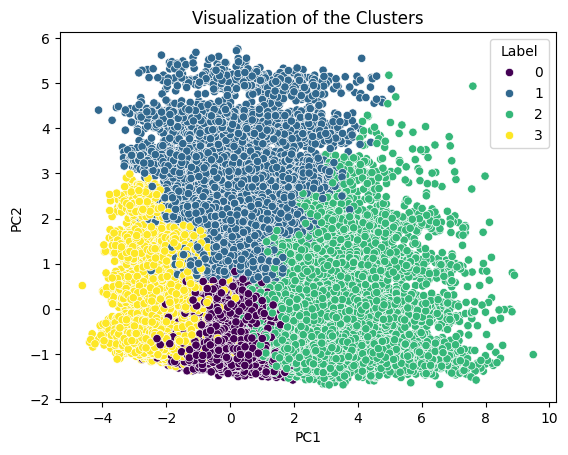

In [112]:
# visualizing the clusters
sns.scatterplot(data=kmeans_df, x='PC1', y='PC2', hue='Label', palette='viridis')
plt.title('Visualization of the Clusters')

### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) 
  - a. Find the optimal K Value using dendrogram for Agglomerative clustering.
  - b. Build a Agglomerative clustering model using the obtained optimal K
         value observed from dendrogram.
  - c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. 

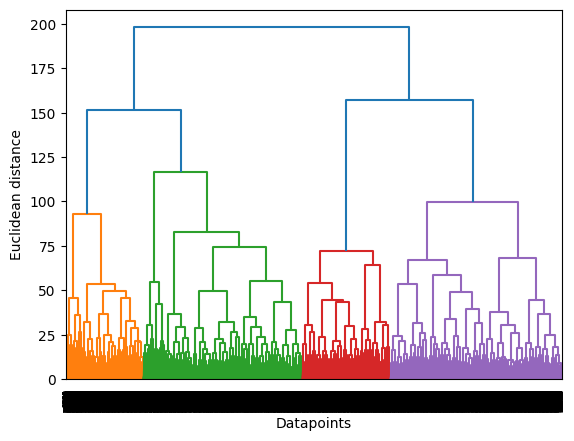

In [113]:
# Compute the hierarchical clustering linkage matrix using Ward's method
# to save computation time, a sample size we used earlier will be used here too
merg = linkage(sampled_scaled_features_df, method='ward')

# Plot the dendrogram using the hierarchical clustering linkage matrix
dendrogram(merg, leaf_rotation=90)

# Display the dendrogram
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

- The dendrogram suggests the existense of 4 clusters. So, proceeding to Agglomerative Model building using 4 clusters

In [114]:
# Initialize AgglomerativeClustering with the optimum number of clusters and linkage method
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Fit the AgglomerativeClustering model to the scaled features data
hierarchical_cluster_model = hierarchical_cluster.fit(sampled_scaled_features_df)

In [115]:
# silhouette score

for i in range(2, 15):
    # Initialize AgglomerativeClustering with the current number of clusters (i)
    hierarchical_cl = AgglomerativeClustering(n_clusters=i)
    
    # Fit the AgglomerativeClustering model to the scaled features data
    hierarchical_cl = hierarchical_cl.fit(sampled_scaled_features_df)
    
    # Predict the cluster labels for each data point
    labels = hierarchical_cl.fit_predict(sampled_scaled_features_df)
    
    # Compute the silhouette score for the clustering result
    score = silhouette_score(sampled_scaled_features_df, labels)
    
    # Print the number of clusters and the corresponding silhouette score
    print(i, score)

2 0.10191806705850122
3 0.09340002217647864
4 0.10572649945666786
5 0.0952324661928569
6 0.053658489467190866
7 0.06077810986474697
8 0.0550776593658298
9 0.04867478703285944
10 0.05379677583417812
11 0.0376018977195861
12 0.040075746144797364
13 0.04316803234062152
14 0.042609608998442454


In [116]:
## Creating a dataframe of the labels
hier_label_df = pd.DataFrame(hierarchical_cluster_model.labels_,columns=['Labels'])
hier_label_df.head(5)

Labels
0       0
1       1
2       1
3       1
4       1

In [117]:
# joining the label dataframe with unscaled initial cleaned dataframe.(df_copy).
# this is done to attach labels to the dataframe records and segment the data

df_hierarchical = df_copy.join(hier_label_df)
df_hierarchical.head()

fit bust size  weight  rating     rented for          body type category  \
0  fit       34d   137.0    10.0       vacation          hourglass   romper   
1  fit       34b   132.0    10.0          other  straight & narrow     gown   
3  fit       34c   135.0     8.0  formal affair               pear    dress   
4  fit       34b   145.0    10.0        wedding           athletic     gown   
5  fit       32b   138.0     8.0           date           athletic    dress   

     height  size   age  Labels  
0  5.666667    14  28.0     0.0  
1  5.500000    12  36.0     1.0  
3  5.416667     8  34.0     1.0  
4  5.750000    12  27.0     1.0  
5  5.666667     8  45.0     0.0

## ● Conclusion : 
### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

In [133]:
# Broj različitih klastera
num_clusters = df_hierarchical['Labels'].nunique()
print(f"Number of unique clusters: {num_clusters}")


Number of unique clusters: 4


In [227]:
sampled_data = df_hierarchical.groupby('Labels').apply(lambda x: x.sample(n=100))  # Prilagodite broj tačaka po potrebi

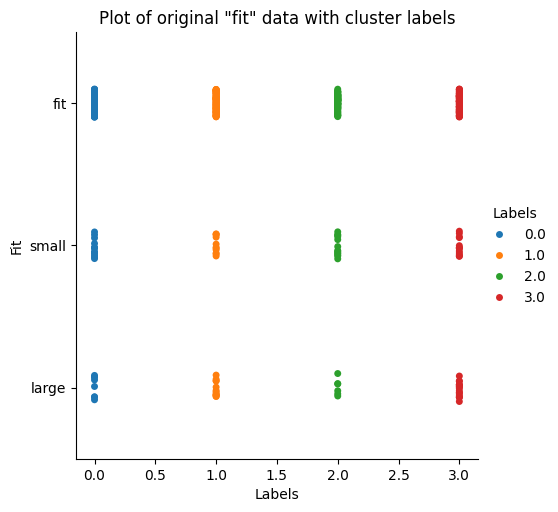

In [238]:
# Cat plot of the 'fit' data vs 'cluster labels' colored by cluster labels
sns.catplot(x='Labels', y='fit', hue='Labels', data=sampled_data, palette='tab10')
plt.title('Plot of original "fit" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('Fit')
plt.show()

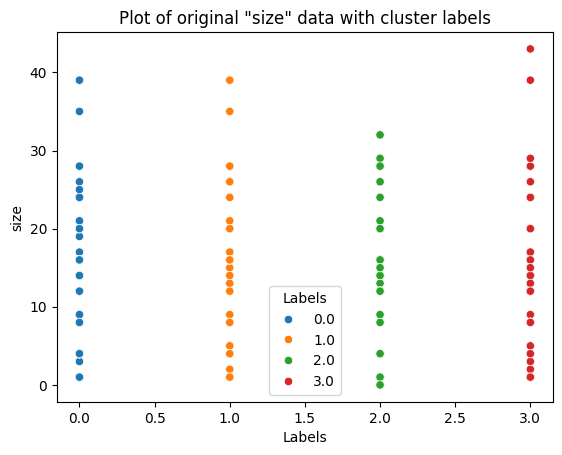

In [239]:
# Cat plot of the 'size' data vs 'cluster labels' colored by cluster labels
sns.scatterplot(x='Labels', y='size', hue='Labels', data=sampled_data, palette='tab10')
plt.title('Plot of original "size" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('size')
plt.show()

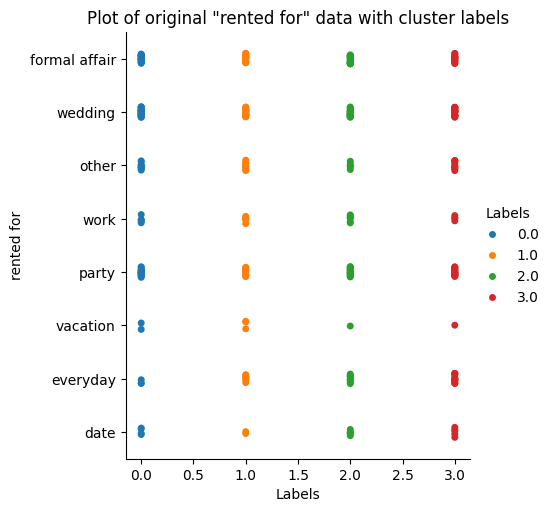

In [240]:
# Cat plot of the 'rented for' data vs 'cluster labels' colored by cluster labels
sns.catplot(x='Labels', y='rented for', hue='Labels', data=sampled_data, palette='tab10')
plt.title('Plot of original "rented for" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('rented for')
plt.show()

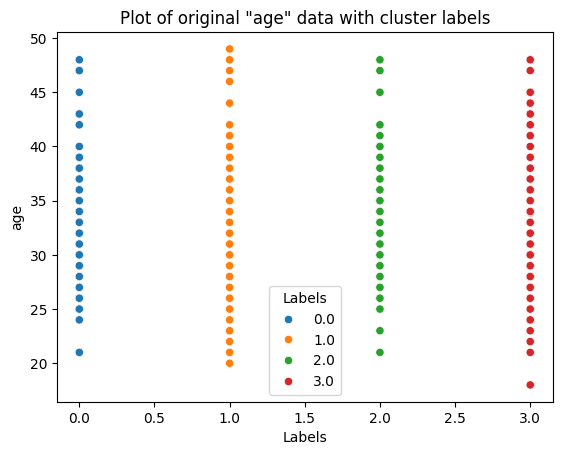

In [241]:
# Cat plot of the 'age' data vs 'cluster labels' colored by cluster labels
sns.scatterplot(x='Labels', y='age', hue='Labels', data=sampled_data, palette='tab10')
plt.title('Plot of original "age" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('age')
plt.show()

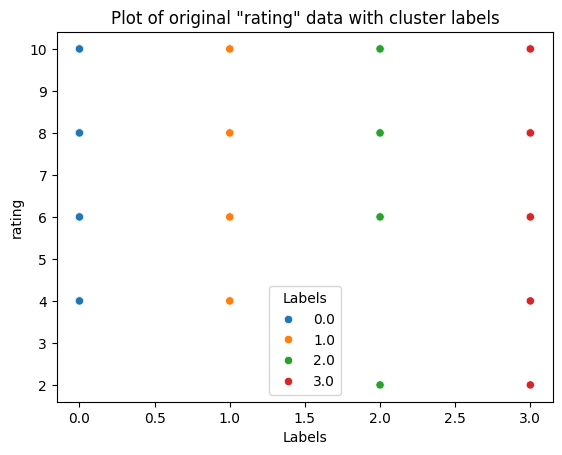

In [242]:

sns.scatterplot(x='Labels', y='rating', hue='Labels', data=sampled_data, palette='tab10')
plt.title('Plot of original "rating" data with cluster labels')
plt.xlabel('Labels')
plt.ylabel('rating')
plt.show()

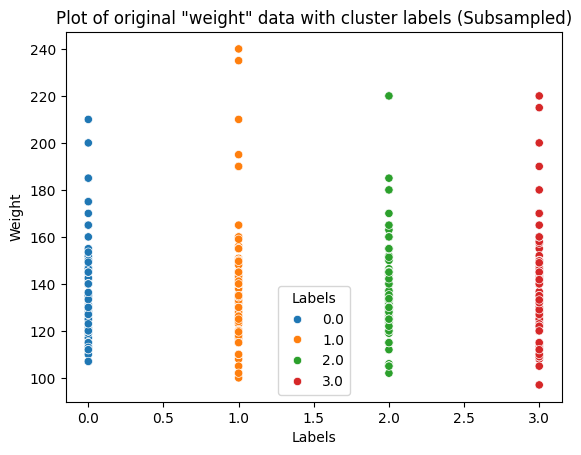

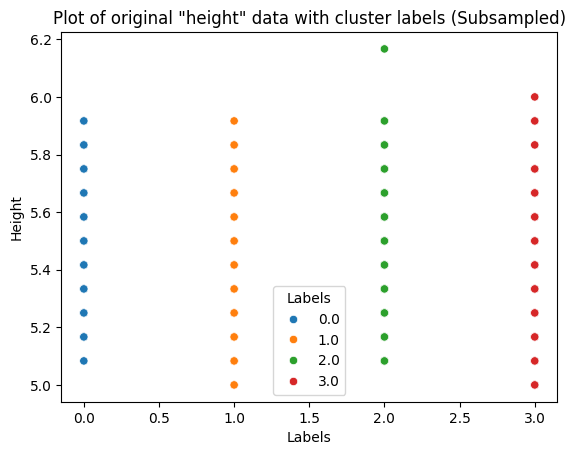

In [243]:
# Subsampliranje podataka
sampled_data = df_hierarchical.groupby('Labels').apply(lambda x: x.sample(n=100))  # Prilagodite broj tačaka po potrebi

# Scatter plot 'weight' data vs 'Labels' colored by cluster labels
sns.scatterplot(x='Labels', y='weight', hue='Labels', data=sampled_data, palette='tab10')
plt.title('Plot of original "weight" data with cluster labels (Subsampled)')
plt.xlabel('Labels')
plt.ylabel('Weight')
plt.show()

# Scatter plot 'height' data vs 'Labels' colored by cluster labels
sns.scatterplot(x='Labels', y='height', hue='Labels', data=sampled_data, palette='tab10')
plt.title('Plot of original "height" data with cluster labels (Subsampled)')
plt.xlabel('Labels')
plt.ylabel('Height')
plt.show()

## NLP

In [205]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
# Preuzimanje NLTK resursa (možda će biti potrebno prvi put)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aleksa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aleksa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aleksa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [206]:
df = pd.read_json('renttherunway_final_data.json', lines=True)
df = df[['review_summary']]
# Slučajno uzorkovanje 50% podataka
df = df.sample(frac=0.4, random_state=42)


In [207]:
# Funkcija za tokenizaciju i uklanjanje stop riječi
def process_text(text):
    tokens = word_tokenize(text)  # Tokenizacija teksta
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Uklanjanje znakova interpunkcije i brojeva
    stop_words = set(stopwords.words('english'))  # Učitavanje stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Uklanjanje stopwords
    return ' '.join(tokens)  # Vraćanje tokeniziranog teksta kao stringa

In [208]:
# Tokenizacija i uklanjanje stopwords za sve recenzije
df['processed_text'] = df['review_summary'].apply(process_text)

In [209]:
# Vektorizacija teksta pomoću TF-IDF vektora
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.9)  # Dodan min_df i max_df za filtriranje rijetkih i čestih riječi
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

In [210]:
# Pronalaženje optimalnog broja klastera pomoću metode lakta (elbow method) i Silhouette Score metode
def find_optimal_clusters(data, max_k):
    sse = []
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        if k > 1:
            silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return sse, silhouette_scores

In [220]:
max_clusters = 10
sse, silhouette_scores = find_optimal_clusters(tfidf_matrix, max_clusters)

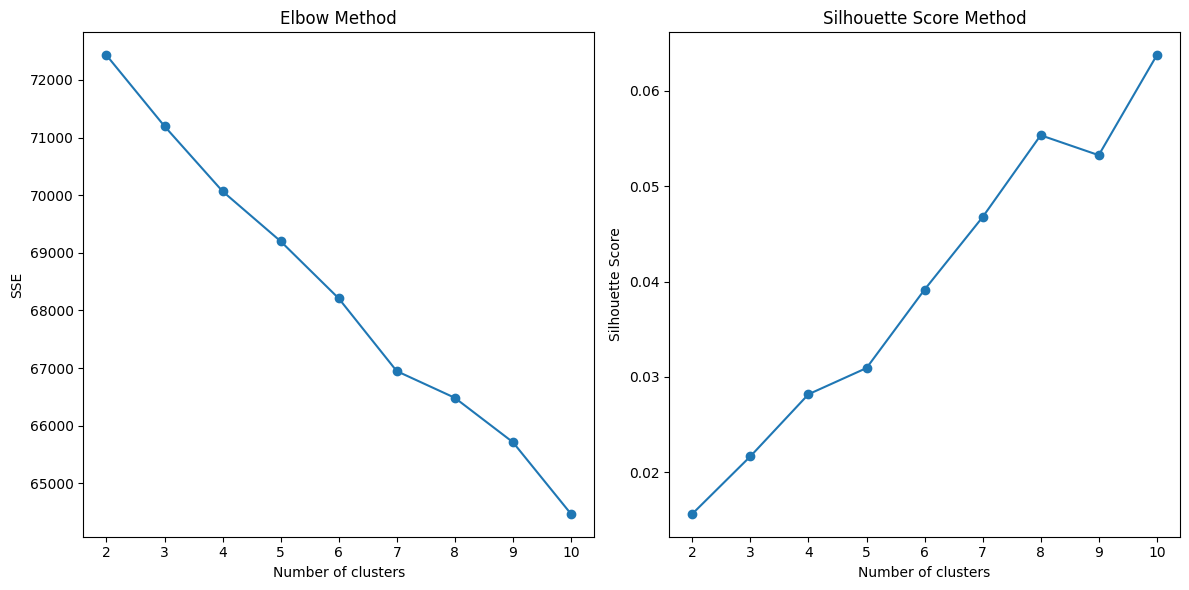

In [221]:
# Prikaz rezultata metode lakta
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters+1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()

In [222]:
# Odabir optimalnog broja klastera
optimal_clusters = np.argmax(silhouette_scores) + 2  # +2 jer smo počeli s k=2
print(f'Optimal number of clusters: {optimal_clusters}')

# Primjena k-means clusteringa s optimalnim brojem klastera
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)  
kmeans.fit(tfidf_matrix)

# Dodavanje rezultata klasteriranja u DataFrame
df['cluster'] = kmeans.labels_

# Ispis broja recenzija u svakom klasteru
print("\nNumber of reviews in each cluster:")
print(df['cluster'].value_counts())

Optimal number of clusters: 10

Number of reviews in each cluster:
cluster
0    39122
3     6961
1     6794
6     5820
2     4401
5     4327
7     3586
9     2893
8     1788
4     1326
Name: count, dtype: int64


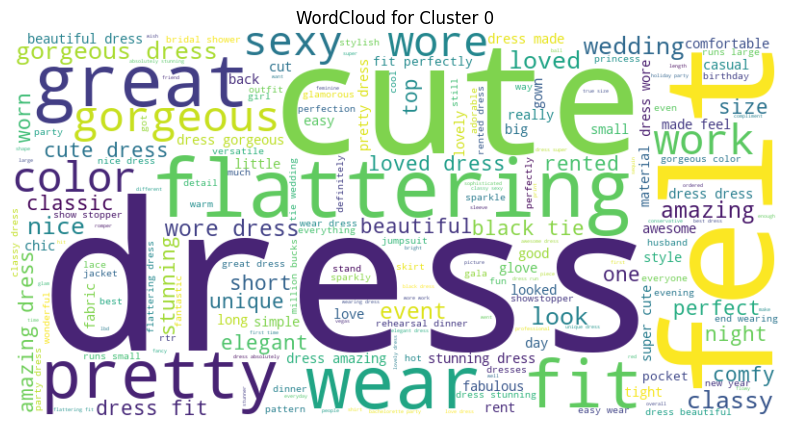

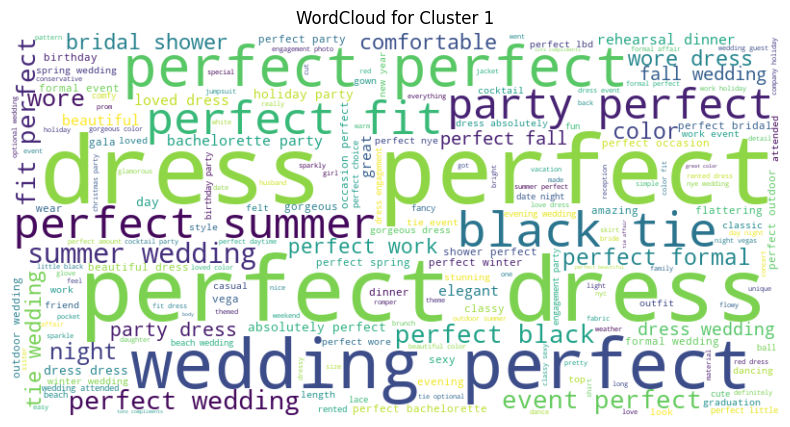

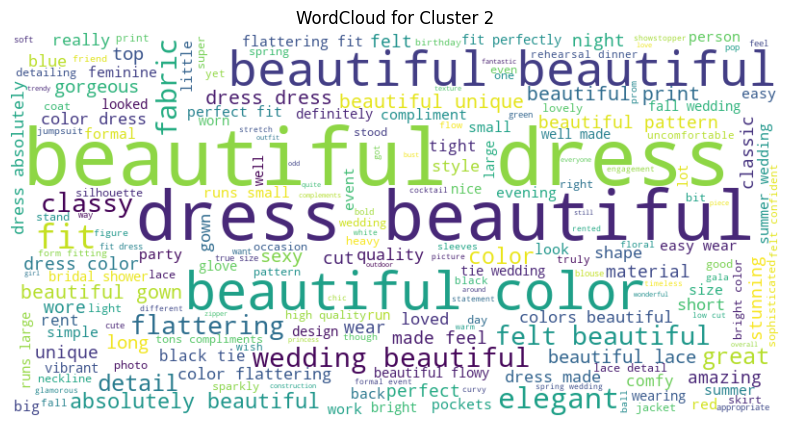

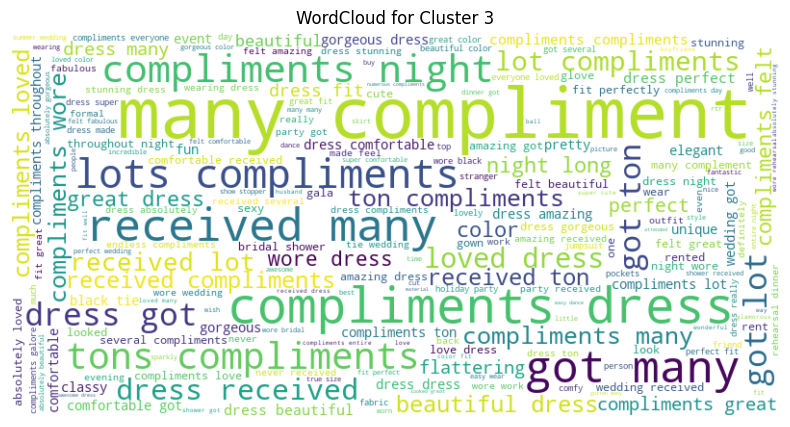

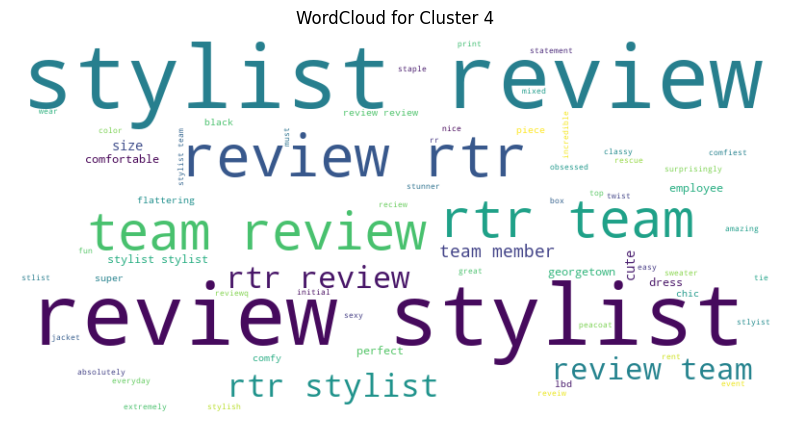

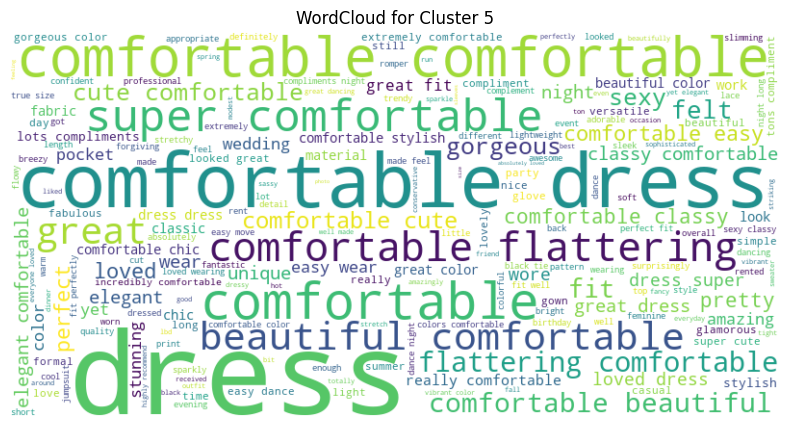

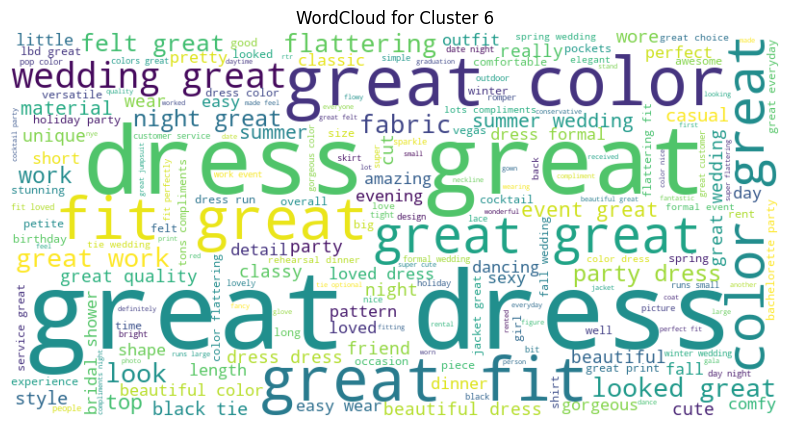

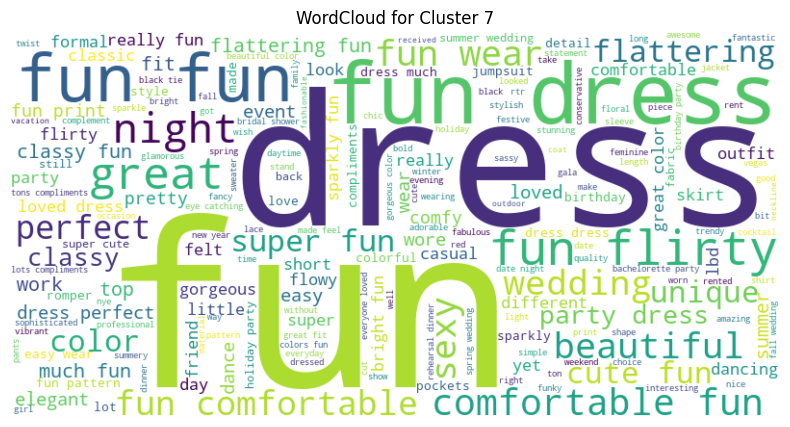

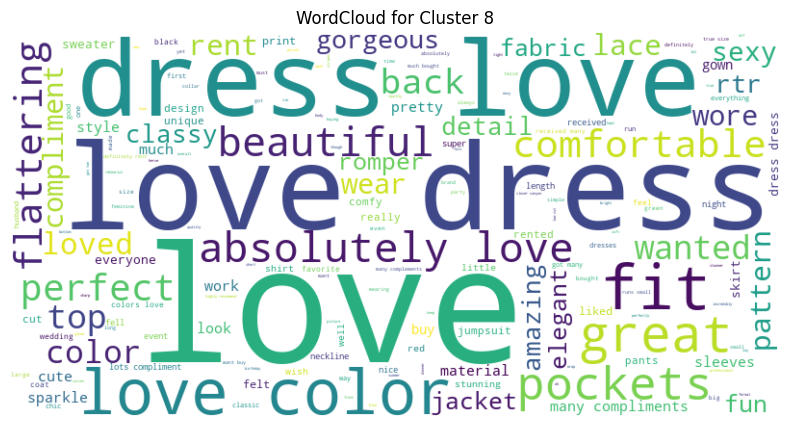

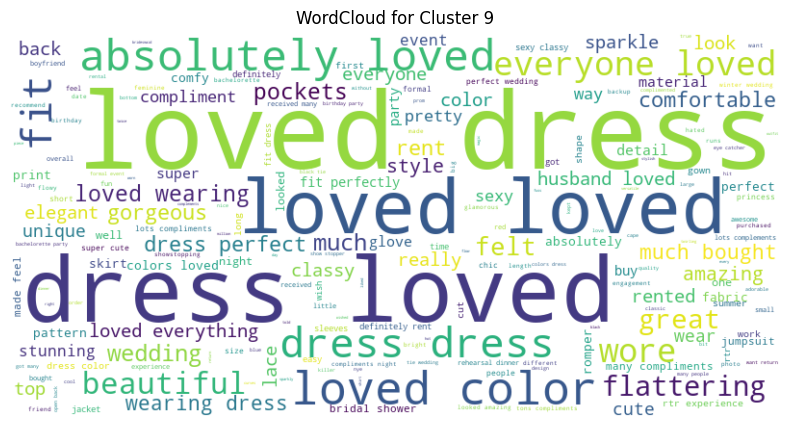

In [223]:
# Izrada WordCloud-a za svaki klaster
for cluster in range(optimal_clusters):
    cluster_data = df[df['cluster'] == cluster]['processed_text']
    cluster_text = ' '.join(cluster_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

In [224]:
# Prikaz središnjih riječi u svakom klasteru
print("\nCentral words in each cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(optimal_clusters):
    print(f"Cluster {i}: ", end='')
    for ind in order_centroids[i, :10]:
        print(f'{terms[ind]}', end=', ')
    print()


Central words in each cluster:
Cluster 0: dress, cute, gorgeous, amazing, flattering, wore, pretty, stunning, sexy, fit, 
Cluster 1: perfect, dress, wedding, party, summer, fit, event, black, formal, tie, 
Cluster 2: beautiful, dress, color, fit, wedding, felt, flattering, elegant, fabric, classy, 
Cluster 3: compliments, many, got, received, dress, lots, night, tons, loved, wore, 
Cluster 4: review, stylist, team, rtr, size, cute, chic, piece, lbd, comfortable, 
Cluster 5: comfortable, dress, flattering, beautiful, super, cute, great, classy, fit, elegant, 
Cluster 6: great, dress, color, fit, wedding, work, party, night, summer, flattering, 
Cluster 7: fun, dress, flirty, comfortable, wear, flattering, party, super, great, classy, 
Cluster 8: love, dress, color, fit, absolutely, pockets, wanted, great, top, flattering, 
Cluster 9: loved, dress, color, absolutely, everyone, fit, much, wore, beautiful, flattering, 


In [225]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Inicijalizacija VADER sentiment analizatora
sid = SentimentIntensityAnalyzer()

# Funkcija za analizu sentimenta pomoću VADER-a
def analyze_sentiment_vader(text):
    # Izračunavanje sentimenta teksta pomoću VADER-a
    scores = sid.polarity_scores(text)
    # Određivanje sentimenta na temelju polariteta
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Primjena analize sentimenta na vaše podatke
df['sentiment_vader'] = df['review_summary'].apply(analyze_sentiment_vader)

# Prikaz rezultata
print(df[['review_summary', 'sentiment_vader']])


                                           review_summary sentiment_vader
36249                           Wore for Hollywood Party.        positive
9043                  Flattering fit, tons of compliments        positive
70      Comfortable and put together for a late summer...        positive
142409                                    Stylist Review          neutral
10805   Thank you RTR- I found a gown that is plus siz...        positive
...                                                   ...             ...
97545                                    Classic but chic        positive
152994           I got so many compliments on this dress!        positive
34893                                         Very classy        positive
116684                    Received compliments all night!        positive
13103   Perfect amount of glam to celebrate my birthda...        positive

[77018 rows x 2 columns]
